In [1]:
# Initial Imports
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

# Set the random seed for reproducibility
# Note: This is used for model prototyping, but it is good practice to comment this out and run multiple experiments to evaluate your model.
from numpy.random import seed

seed(1)
from tensorflow import random

random.set_seed(2)

In [2]:
# read in data 
df = pd.read_csv(
    Path("WEOApr2021all.csv")
)

df = df[(df["Subject Descriptor"]=="Gross domestic product, current prices") & (df["Units"]=="U.S. dollars")]
df.drop(columns=["Subject Descriptor", "Units", "Scale", "Estimates Start After"], inplace=True)
df = df.T
df.columns = df.loc["Country"]
df = df.drop("Country", axis=0)
df.head()

Country,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,...,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
WEO Country Code,512,914,612,614,311,213,911,314,193,122,...,111,298,927,846,299,582,487,474,754,698
ISO,AFG,ALB,DZA,AGO,ATG,ARG,ARM,ABW,AUS,AUT,...,USA,URY,UZB,VUT,VEN,VNM,WBG,YEM,ZMB,ZWE
WEO Subject Code,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD,...,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD,NGDPD
Subject Notes,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...,Values are based upon GDP in national currency...
Country/Series-specific Notes,"See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...",...,"See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren...","See notes for: Gross domestic product, curren..."


In [27]:
# select country from master data set to research 
Japan_df = df[['Japan']]

Japan_gdp = Japan_df.drop(labels=["WEO Country Code", "ISO", "WEO Subject Code", "Subject Notes", "Country/Series-specific Notes"], axis=0)

Japan_gdp.rename(columns = {'Country':'Year'}, inplace = True)

#df = df.replace(",","", regex=True)
#df = df.astype("float")
#df

#converrt data to floats for ease of analysis 
Japan_gdp = Japan_gdp.replace(",","", regex=True)
Japan_gdp = Japan_gdp.astype("float")

Japan_gdp["lagged GDP"] = Japan_gdp[["Japan"]]
#d['gdp'] = df['gdp'].shift(-5)
Japan_gdp["lagged GDP"] = Japan_gdp['lagged GDP'].shift(10)



Country
Japan         float64
lagged GDP    float64
dtype: object

In [4]:
# feed data into the Window_data funtion to create the arrays for x and y
def window_data(Japan_gdp, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(Japan_gdp) - window):
        features = Japan_gdp.iloc[i : (i + window), feature_col_number]
        target = Japan_gdp.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [6]:
# Creating the features (X) and target (y) data using the window_data() function.
window_size = 20

feature_column = 0
target_column = 1
X, y = window_data(Japan_gdp, window_size, feature_column, target_column)
print (f"X sample values:\n{X} \n")
print (f"y sample values:\n{y[:5]}")

X sample values:
[[1127.88 1243.79 1157.6  1268.62 1345.2  1427.35 2121.25 2584.34 3134.18
  3117.07 3196.56 3657.35 3988.33 4544.77 4998.8  5545.57 4923.39 4492.45
  4098.36 4635.98]
 [1243.79 1157.6  1268.62 1345.2  1427.35 2121.25 2584.34 3134.18 3117.07
  3196.56 3657.35 3988.33 4544.77 4998.8  5545.57 4923.39 4492.45 4098.36
  4635.98 4968.36]
 [1157.6  1268.62 1345.2  1427.35 2121.25 2584.34 3134.18 3117.07 3196.56
  3657.35 3988.33 4544.77 4998.8  5545.57 4923.39 4492.45 4098.36 4635.98
  4968.36 4374.71]
 [1268.62 1345.2  1427.35 2121.25 2584.34 3134.18 3117.07 3196.56 3657.35
  3988.33 4544.77 4998.8  5545.57 4923.39 4492.45 4098.36 4635.98 4968.36
  4374.71 4182.85]
 [1345.2  1427.35 2121.25 2584.34 3134.18 3117.07 3196.56 3657.35 3988.33
  4544.77 4998.8  5545.57 4923.39 4492.45 4098.36 4635.98 4968.36 4374.71
  4182.85 4519.56]
 [1427.35 2121.25 2584.34 3134.18 3117.07 3196.56 3657.35 3988.33 4544.77
  4998.8  5545.57 4923.39 4492.45 4098.36 4635.98 4968.36 4374.71 4182.85


In [7]:
# Use 90% of the data for training and the remainder for testing
split = int(0.9 * len(X))
X_train = X[: split]
X_test = X[split - 20:]
y_train = y[: split]
y_test = y[split - 20:]

In [8]:
# Use the MinMaxScaler to scale data between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [9]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print (f"X_train sample values:\n{X_train[:5]} \n")
print (f"X_test sample values:\n{X_test[:5]}")

X_train sample values:
[[[0.        ]
  [0.01964234]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.00542264]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.20534039]
  [0.41418583]
  [0.66568997]
  [0.37949862]
  [0.18127415]
  [0.        ]
  [0.2089842 ]]

 [[0.02623769]
  [0.        ]
  [0.02530099]
  [0.01790528]
  [0.01861179]
  [0.14438803]
  [0.11155811]
  [0.14908813]
  [0.        ]
  [0.02519261]
  [0.14981143]
  [0.12656931]
  [0.24362202]
  [0.41418583]
  [0.66568997]
  [0.37949862]
  [0.18127415]
  [0.        ]
  [0.24729531]
  [0.36227834]]

 [[0.0067275 ]
  [0.02530099]
  [0.04275325]
  [0.0371129 ]
  [0.17582076]
  [0.24074868]
  [0.24401425]
  [0.14444878]
  [0.02519261]
  [0.1712299 ]
  [0.25741921]
  [0.33935625]
  [0.44240662]
  [0.66568997]
  [0.37949862]
  [0.18127415]
  [0.        ]
  [0.24729531]
  [0.40018399]
  [0.08848611]]

 [[0.03185828]
  [0.04275325]
  [0.0614749 ]
  [0.19935468]
  [0.280737

In [10]:
# Import required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [11]:
# Define the LSTM RNN model.
model = Sequential()

number_units = 5
dropout_fraction = 0.4

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))


model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer


model.add(Dense(1))

In [12]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error", metrics= ["accuracy"])

In [13]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 5)             140       
_________________________________________________________________
dropout (Dropout)            (None, 20, 5)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 5)             220       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20, 5)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 5)                 220       
_________________________________________________________________
dropout_2 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 6

In [49]:
# Train the model
model.fit(X_train, y_train, epochs=1000, shuffle=False, batch_size=1, verbose=1)

Epoch 1/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0343 - accuracy: 0.0833
Epoch 2/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0266 - accuracy: 0.0833
Epoch 3/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0185 - accuracy: 0.0833
Epoch 4/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0270 - accuracy: 0.0833
Epoch 5/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0197 - accuracy: 0.0833
Epoch 6/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0244 - accuracy: 0.0833
Epoch 7/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0384 - accuracy: 0.0417
Epoch 8/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0202 - accuracy: 0.0833
Epoch 9/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0163 - accuracy: 0.0833
Epoch 10/1000
24/24 [==============================] - 0s 6ms/step - loss: 0.0264 - accuracy: 0.0833

In [51]:
# Evaluate the model
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 13ms/step - loss: 0.0102 - accuracy: 0.0435


[0.010159958153963089, 0.043478261679410934]

In [52]:
# get predictions from the X_test
predicted = model.predict(X_test)

In [53]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [54]:
# Create a DataFrame of Real and Predicted values
GDP = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
    }, index = df.index[-len(real_prices): ])
GDP

,Real,Predicted
2004,4998.80,5134.137695
2005,5545.57,5302.556152
2006,4923.39,4950.688965
2007,4492.45,4721.203125
2008,4098.36,4564.297363
2009,4635.98,4472.124023
2010,4968.36,4416.874023
2011,4374.71,4427.876953
2012,4182.85,4485.830566
2013,4519.56,4552.492188


<AxesSubplot:>

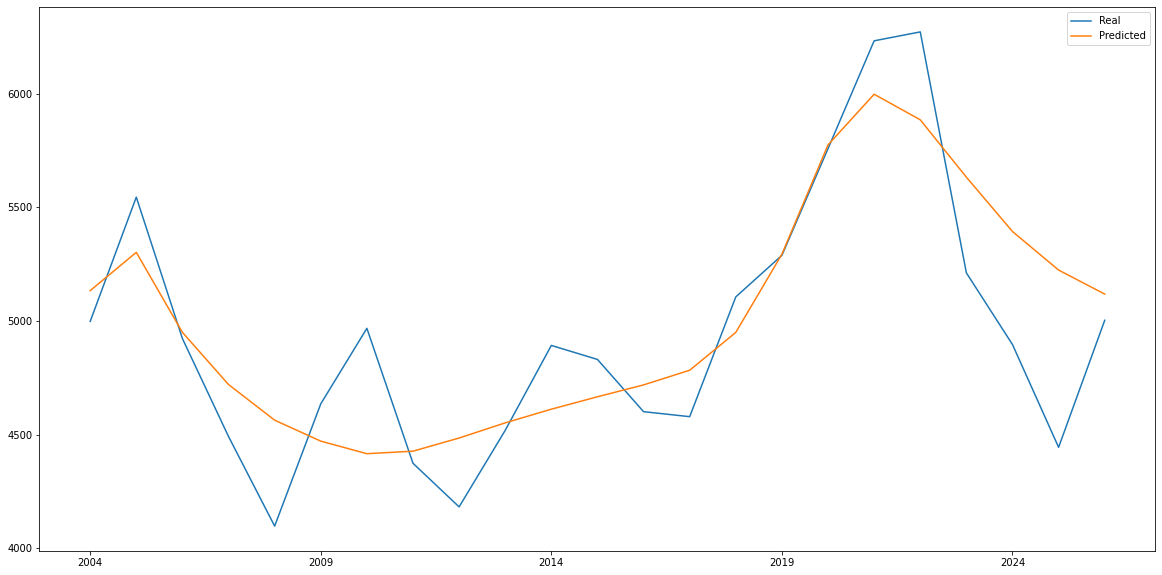

In [55]:
# Plot the real vs predicted prices as a line chart
GDP.plot(figsize=(20,10))

# R2 Score 

In [56]:
from sklearn.metrics import r2_score

In [57]:
y_true = GDP['Real']
y_pred = GDP['Predicted']


In [58]:
r2_score(y_true, y_pred)

0.6967840841755558